In [1]:
from __future__ import print_function, division

from sympy.core import S, Dummy, pi
from sympy.functions.combinatorial.factorials import factorial
from sympy.functions.elementary.trigonometric import sin, cos
from sympy.functions.elementary.miscellaneous import sqrt
from sympy.functions.special.gamma_functions import gamma
from sympy.polys.orthopolys import legendre_poly, laguerre_poly, hermite_poly, jacobi_poly
from sympy.polys.rootoftools import RootOf
from sympy.core.compatibility import xrange

In [2]:
def gauss_lobatto(n, n_digits):
    r"""
    Computes the Gauss-Legendre quadrature [1]_ points and weights.

    The Gauss-Lobatto quadrature approximates the integral:

    .. math::
        \int_{-1}^1 f(x)\,dx \approx \sum_{i=1}^n w_i f(x_i)

    The nodes `x_i` of an order `n` quadrature rule are the roots of `P'_(n-1)`
    and the weights `w_i` are given by:

    .. math::
        w_i = \frac{2}{n(n-1) \left[P_{n-1}(x_i)\right]^2},\quad x\neq\pm 1
        w_i = \frac{2}{n(n-1)},\quad x=\pm 1

    Parameters
    ==========

    n : the order of quadrature

    n_digits : number of significant digits of the points and weights to return

    Returns
    =======

    (x, w) : the ``x`` and ``w`` are lists of points and weights as Floats.
             The points `x_i` and weights `w_i` are returned as ``(x, w)``
             tuple of lists.

    Examples
    ========

    >>> #from sympy.integrals.quadrature import gauss_lobatto
    >>> x, w = gauss_lobatto(3, 5)
    >>> x
    [-1, 0, 1]
    >>> w
    [0.33333, 1.3333, 0.33333]
    >>> x, w = gauss_lobatto(4, 5)
    >>> x
    [-1, -0.44721, 0.44721, 1]
    >>> w
    [0.16667, 0.83333, 0.83333, 0.16667]

    See Also
    ========

    gauss_legendre,gauss_laguerre, gauss_gen_laguerre, gauss_hermite, gauss_chebyshev_t,\
    gauss_chebyshev_u, gauss_jacobi

    References
    ==========

    .. [1] http://en.wikipedia.org/wiki/Gaussian_quadrature#Gauss.E2.80.93Lobatto_rules
    .. [2] http://people.math.sfu.ca/~cbm/aands/page_888.htm
    """
    x = Dummy("x")
    p = legendre_poly(n-1, x, polys=True)
    pd = p.diff(x)
    xi = []
    w  = []
    for r in pd.real_roots():
        if isinstance(r, RootOf):
            r = r.eval_rational(S(1)/10**(n_digits+2))
        xi.append(r.n(n_digits))
        w.append((2/(n*(n-1) * p.subs(x, r)**2)).n(n_digits))
    
    xi.insert(0, -1)
    xi.append(1)
    w.insert(0,(S(2)/(n*(n-1))).n(n_digits))
    w.append((S(2)/(n*(n-1))).n(n_digits))
    
    return xi, w

In [3]:
%matplotlib inline
import sympy as sym

In [4]:
y = sym.symbols('y')

Gauss-Lobatto quadrature can integrate exactly polynomials up to $2n-3$, where $n$ is the number of points used

## Fourth order polynomial

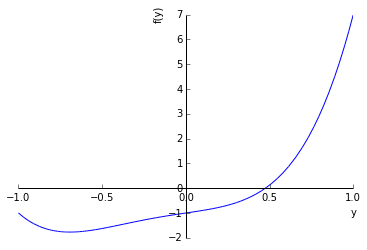

In [5]:
poly = 4*y**4 + 3*y**3 + y - 1
sym.plot(poly, (y, -1, 1));

In [6]:
print(sym.integrate(poly,(y,-1,1)))
print(sym.integrate(poly,(y,-1,1)).n(8))

-2/5
-0.40000000


In [7]:
for k in range(2,10):
    xi, w = gauss_lobatto(k, 8)
    poly_int = sum(w[j]*poly.subs(y, xi[j]) for j in range(k))
    print(k, poly_int)

2 6.0000000
3 0.66666667
4 -0.40000000
5 -0.40000000
6 -0.40000000
7 -0.40000000
8 -0.40000000
9 -0.40000000


## Fifth order polynomial

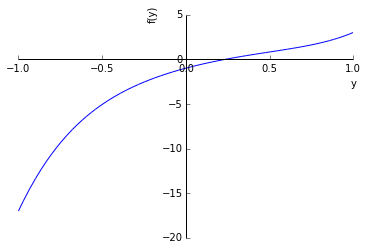

In [8]:
poly = 2*y**5 - 2*y**4 + 3*y**3 - 4*y**2  + 5*y - 1
sym.plot(poly, (y, -1, 1));

In [9]:
print(sym.integrate(poly,(y,-1,1)))
print(sym.integrate(poly,(y,-1,1)).n(8))

-82/15
-5.4666667


In [10]:
for k in range(2,10):
    xi, w = gauss_lobatto(k, 8)
    poly_int = sum(w[j]*poly.subs(y, xi[j]) for j in range(k))
    print(k, poly_int)

2 -14.000000
3 -6.0000000
4 -5.4666667
5 -5.4666667
6 -5.4666667
7 -5.4666667
8 -5.4666667
9 -5.4666667


## Trascendent function

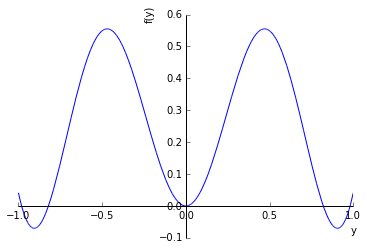

In [11]:
fun = y*sym.sin(5*y) + y**2
sym.plot(fun, (y, -1, 1));

In [12]:
fun_int = sym.integrate(fun,(y,-1,1))
print(fun_int)
print(fun_int.n(8))

-2*cos(5)/5 + 2*sin(5)/25 + 2/3
0.47648785


In [13]:
print("{}\t{}\t{}".format('n', 'Integral', 'Relative error'))
print("===========================================")
for k in range(2,20):
    xi, w = gauss_lobatto(k, 8)
    poly_int = sum(w[j]*fun.subs(y, xi[j]) for j in range(k))
    print("{}\t{}\t{}".format(k, float(poly_int), float((fun_int - poly_int)/poly_int)))

n	Integral	Relative error
2	0.0821514506737	4.80011488259
3	0.027383816904	16.4003446056
4	0.933433420263	-0.48953204331
5	0.381288445645	0.249678180132
6	0.48623530045	-0.0200467748469
7	0.475875933472	0.00128587588386
8	0.476514071062	-5.50250332342e-05
9	0.476487031109	1.72040244723e-06
10	0.476487871346	-4.29955194288e-08
11	0.47648784975	2.32630894947e-09
12	0.476487849619	2.54300561481e-09
13	0.476487850528	6.94897244055e-10
14	0.47648785095	-2.48946810218e-10
15	0.476487850553	7.00193794494e-10
16	0.476487850467	9.38803083512e-10
17	0.476487850257	1.14711144529e-09
18	0.476487850304	1.22253587094e-09
19	0.47648785107	-5.01521965971e-10


In [14]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()